In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns
import re
#place file in same directory as script if you do not want to use the full file location
credit_card = pd.read_csv("C:/Users/Carl/Desktop/practice/UCI_credit_card.csv")
print(credit_card.head())

#make a copy of the csv file
df = credit_card.copy()

#make first row the header

header = df.iloc[0]
df = df[1:]
df.columns = header
df.head()

  Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23             

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
#checking for missing values
print(df.isnull().sum())
#change all values to integers 
df = df.apply(pd.to_numeric)
print(df.dtypes)

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64
0
ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE

In [3]:
#check distinct values for SEX, EDUCATION, and MARRIAGE
print(df.SEX.value_counts())
print(df.EDUCATION.value_counts())
print(df.MARRIAGE.value_counts())

2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


In [4]:
#replace unknown values with random value from 1-4 for EDUCATION
random.seed(107)
df["EDUCATION"].replace({0:(random.randint(1,4)),5:(random.randint(1,4)),6:(random.randint(1,4))}, inplace = True)
print(df.EDUCATION.value_counts())
#replace unkown values with random value from 1-3 for MARRIAGE 
df["MARRIAGE"].replace({0:(random.randint(1,3))}, inplace = True)
print(df.MARRIAGE.value_counts())

2    14044
1    10585
3     4917
4      454
Name: EDUCATION, dtype: int64
2    16018
1    13659
3      323
Name: MARRIAGE, dtype: int64


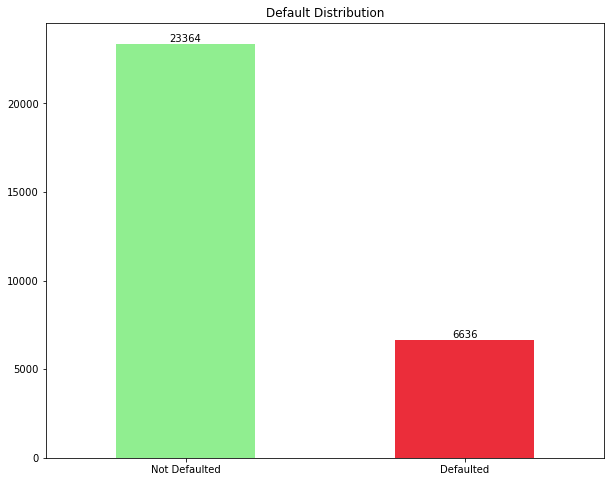

In [5]:
#Rename Column to make simpler
df.rename(columns={"default payment next month":"DEFAULT"},inplace=True)
#Visualize Default Distribution
#Create Plot
plt.figure(figsize=(10,8))
ax3 = df["DEFAULT"].value_counts().sort_index().plot(kind="bar",color=["#90ee90","#eb2d3a"])
ax3.bar_label(ax3.containers[0])
#Label(Default 0=Not Defaulted, 1=Defaulted)
plt.xticks([0,1],["Not Defaulted","Defaulted"],rotation=0)
plt.title("Default Distribution")
plt.show()

int64


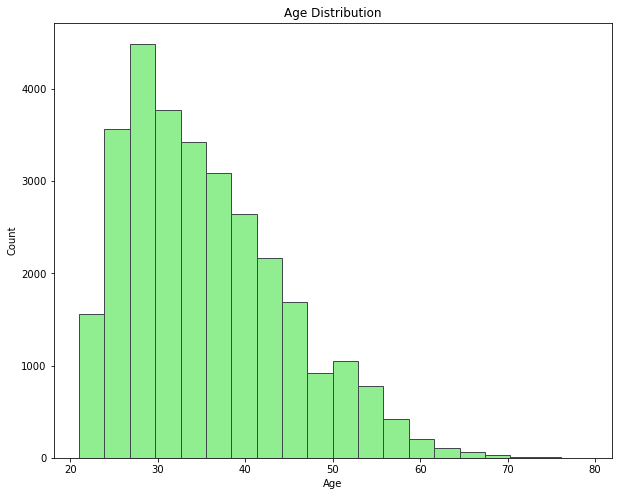

In [6]:
#Convert data "AGE" column to numeric
print(df["AGE"].dtype)
df["AGE"] = pd.to_numeric(df["AGE"], errors="coerce") # "coerce" replaces non-numeric values with NaN

#Visualize Age Distribution
#Create Plot
plt.figure(figsize=(10,8))
age_plot = df["AGE"].plot(kind="hist",bins=20,color="#90ee90",edgecolor="#414a4c")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

DEFAULT      0     1
SEX                 
1         9015  2873
2        14349  3763


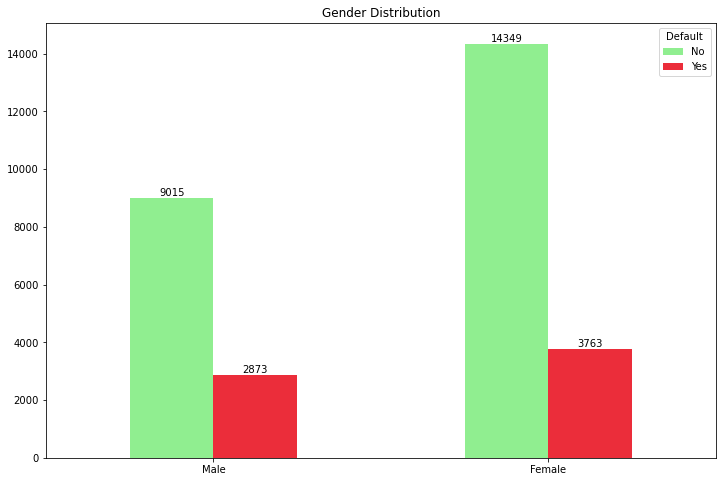

In [7]:
#Visualize Gender Distribution
gender_df = df.groupby(["SEX","DEFAULT"]).size().unstack(fill_value=0)
print(gender_df)
#Create Plot
fig, ax = plt.subplots(figsize=(12,8))
gender_df.plot(kind="bar",color=["#90ee90","#eb2d3a"],ax=ax,xlabel="")
#Bar Labels
for containers in ax.containers:
    ax.bar_label(containers)
#Legends
ax.legend(["No","Yes"],title="Default")
#Plot Labels (Gender: 1=Male, 2=Female), (Default: 0=No, 1=Yes)
plt.xticks([0,1],["Male","Female"],rotation=0)
plt.title("Gender Distribution")
#Plot
plt.show()

DEFAULT        0     1
EDUCATION             
1           8549  2036
2          10714  3330
3           3680  1237
4            421    33


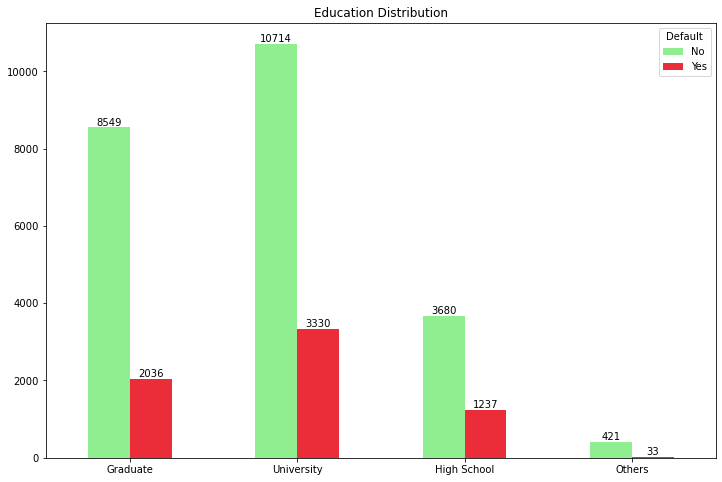

In [8]:
#Visualize Education Distribution
education_df = df.groupby(["EDUCATION", "DEFAULT"]).size().unstack(fill_value=0)
print(education_df)
#Create Plot
fig, ax = plt.subplots(figsize=(12, 8))
education_df.plot(kind="bar",color=["#90ee90","#eb2d3a"],ax=ax,xlabel="")
#Bar Labels
for container in ax.containers:
    ax.bar_label(container)
#Legend
ax.legend(["No","Yes"],title="Default")
#Plot Labels (Education: 1=Graduate, 2=University, 3=High School, 4=Others), (Default: 0=No, 1=Yes)
plt.title("Education Distribution")
plt.xticks([0,1,2,3],["Graduate","University","High School","Others"],rotation=0)
#Plot
plt.show()


DEFAULT       0     1
MARRIAGE             
1         10453  3206
2         12672  3346
3           239    84


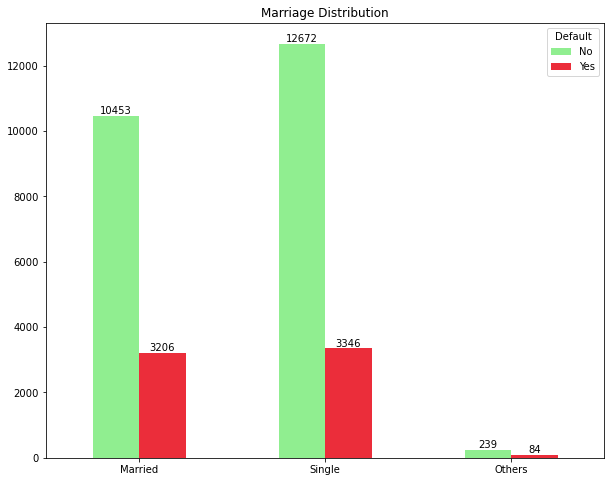

In [10]:
#Visualize MARRIAGE Distribution

marriage_df = df.groupby(["MARRIAGE","DEFAULT"]).size().unstack(fill_value=0)
print(marriage_df)

#Creat Plot
fig, ax = plt.subplots(figsize=(10,8))
marriage_df.plot(kind="bar", color=["#90ee90","#eb2d3a","#add8e6"],ax=ax,xlabel="")
#Label Bars
for container in ax.containers:
    ax.bar_label(container)
#Legend
ax.legend(["No","Yes"],title="Default")
#Plot Labels
plt.xticks([0,1,2],["Married","Single","Others"],rotation=0)
plt.title("Marriage Distribution")
#Plot
plt.show()

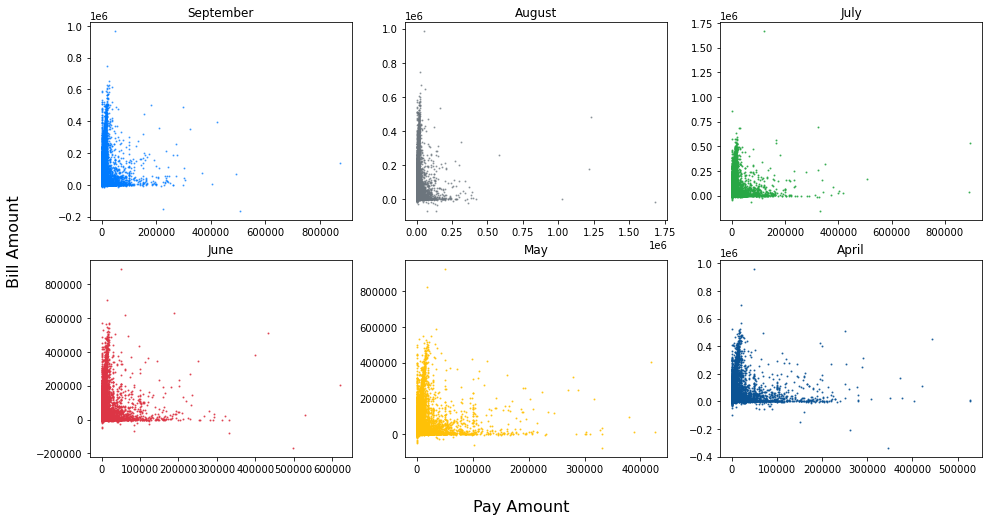

In [14]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(16,8))
#PAYMENT 1 AND BILL 1
ax[0,0].scatter(df["PAY_AMT1"],df["BILL_AMT1"],alpha=0.6,color="#007bff",s=1)
ax[0,0].set_title("September")
#PAYMENT 2 AND BILL 2
ax[0,1].scatter(df["PAY_AMT2"],df["BILL_AMT2"],alpha=0.6,color="#6c757d",s=1)
ax[0,1].set_title("August")
#PAYMENT 3 AND BILL 3
ax[0,2].scatter(df["PAY_AMT3"],df["BILL_AMT3"],alpha=0.8,color="#28a745",s=1)
ax[0,2].set_title("July")
#PAYMENT 4 AND BILL 4
ax[1,0].scatter(df["PAY_AMT4"],df["BILL_AMT4"],alpha=0.8,color="#dc3545",s=1)
ax[1,0].set_title("June")
#PAYMENT 5 AND BILL 5
ax[1,1].scatter(df["PAY_AMT5"],df["BILL_AMT5"],alpha=0.8,color="#ffc107",s=1)
ax[1,1].set_title("May")
#PAYMENT 6 AND BILL 6
ax[1,2].scatter(df["PAY_AMT6"],df["BILL_AMT6"],alpha=0.8,color="#0b5394",s=1)
ax[1,2].set_title("April")
fig.text(0.5, 0.04, "Pay Amount", ha="center", va="center", fontsize=16)
fig.text(0.06, 0.5, "Bill Amount", ha="center", va="center", rotation="vertical", fontsize=16)
plt.show()